In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from google.colab import files


In [5]:
df = pd.read_csv("/Loan-Approval-Prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
# Drop ID column if exists
if 'Loan_ID' in df.columns:
    df.drop('Loan_ID', axis=1, inplace=True)

# Fill missing values
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])


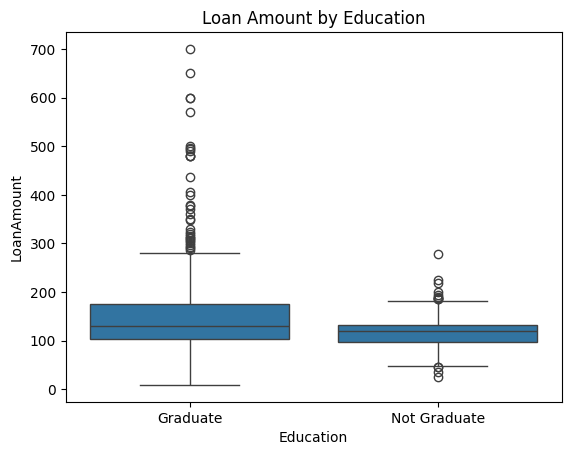

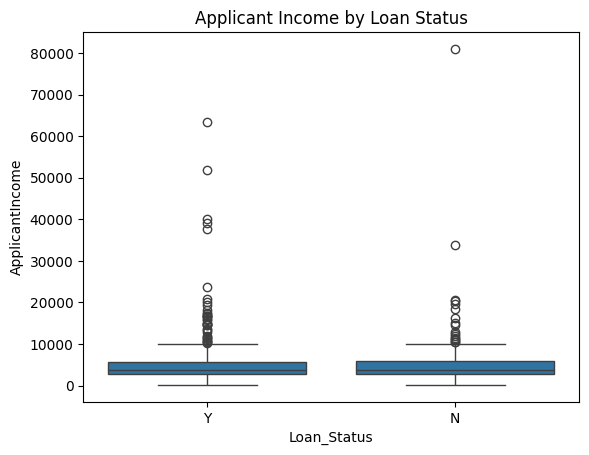

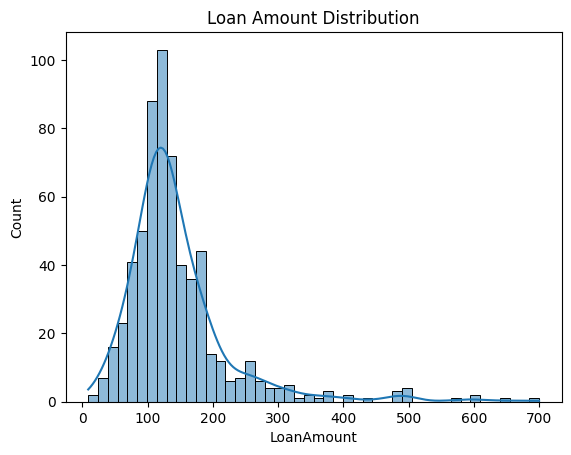

In [10]:
# LoanAmount by Education
sns.boxplot(x='Education', y='LoanAmount', data=df)
plt.title("Loan Amount by Education")
plt.show()

# Income distribution by Loan Status
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=df)
plt.title("Applicant Income by Loan Status")
plt.show()

# LoanAmount distribution
sns.histplot(df['LoanAmount'], kde=True)
plt.title("Loan Amount Distribution")
plt.show()


In [11]:
le = LabelEncoder()
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [12]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.preprocessing import LabelEncoder

if 'Loan_ID' in df.columns:
    df.drop("Loan_ID", axis=1, inplace=True)

# Encode categorical columns
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


Logistic Regression Accuracy: 0.7886178861788617


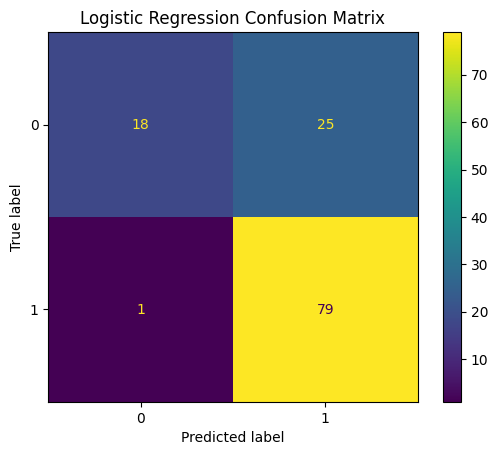

Decision Tree Accuracy: 0.7235772357723578


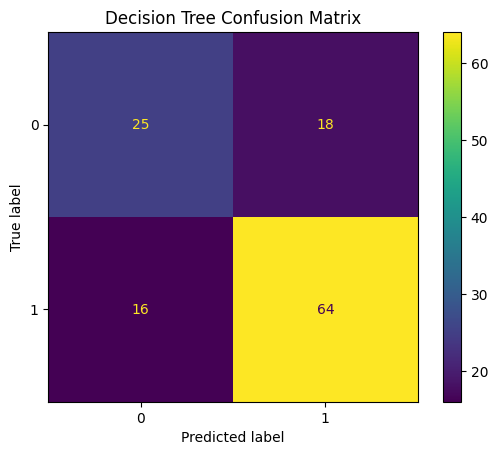

In [17]:
# Logistic Regression Results
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_preds))
ConfusionMatrixDisplay(confusion_matrix(y_test, log_preds)).plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Decision Tree Results
print("Decision Tree Accuracy:", accuracy_score(y_test, tree_preds))
ConfusionMatrixDisplay(confusion_matrix(y_test, tree_preds)).plot()
plt.title("Decision Tree Confusion Matrix")
plt.show()
